<a href="https://colab.research.google.com/github/munyanza/crop_yield/blob/main/cropyield_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# Pandas for data manupulation
# Matplotlib and Seaborn for data virsualization
# Scikit Learn for data preprocessing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


In [89]:
# Load the data

url = 'https://raw.githubusercontent.com/GarvDTU27/CropYieldPred/refs/heads/main/crop%20Yield/datafile.csv'
df = pd.read_csv(url)

In [90]:
# Display the 5 rows

df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [91]:
# Number Rows and columns

df.shape

(49, 6)

In [92]:
# Display the columns

print(df.columns)

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')


In [93]:
# Check the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [94]:
# Statistical data of the datasets

df.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [95]:
# Check the missing values

df.isnull().sum()

,0
Crop,0
State,0
Cost of Cultivation (`/Hectare) A2+FL,0
Cost of Cultivation (`/Hectare) C2,0
Cost of Production (`/Quintal) C2,0
Yield (Quintal/ Hectare),0


In [96]:
# Check the crop columns and all the crops in it

df['Crop'].value_counts()

,count
Crop,
ARHAR,5
COTTON,5
GRAM,5
GROUNDNUT,5
MAIZE,5
MOONG,5
PADDY,5
RAPESEED AND MUSTARD,5
SUGARCANE,5


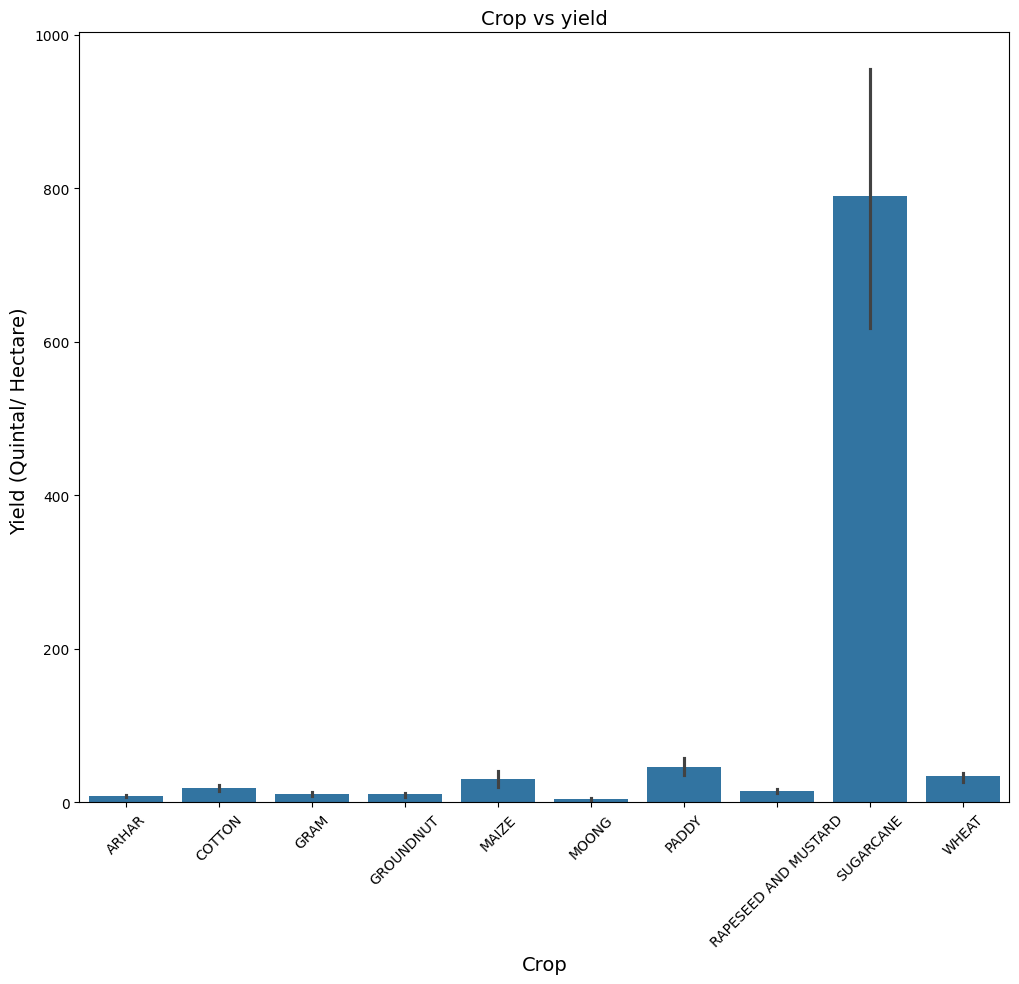

In [97]:
# Virsualization of the Crop vs the Yield

plt.figure(figsize=(12,10))
sns.barplot(x='Crop',y='Yield (Quintal/ Hectare) ', data=df)
plt.title('Crop vs yield',fontsize=14)
plt.xlabel('Crop', fontsize=14)
plt.ylabel('Yield (Quintal/ Hectare) ',fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [98]:
# Seperate the data into Features (X) and target (y)

X = df.drop(['Yield (Quintal/ Hectare) '],axis=1)
y = df['Yield (Quintal/ Hectare) ']

In [104]:
# Crop the columns into the numerical and categorical columns

numerical_cols = ['Cost of Cultivation (`/Hectare) A2+FL','Cost of Cultivation (`/Hectare) C2','Cost of Production (`/Quintal) C2']
categorical_cols = ['Crop', 'State']

print('Numerical Columns: \n',numerical_cols)
print('Categorical Columns: \n',categorical_cols)

Numerical Columns: 
 ['Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2']
Categorical Columns: 
 ['Crop', 'State']


In [102]:
 # StandardScaler standardizes features by removing the mean and scaling to unit variance
 # OneHotEncoder converts categorical features into a one-hot encoded numeric array

numerical_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [103]:
# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
    ('cat',categorical_transformer,categorical_cols),
    ('num',numerical_transformer,numerical_cols)
])

In [105]:
# Apply the preprocessing steps to the features
X_preprocessed = preprocessor.fit_transform(X)

In [106]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y,test_size=0.2,random_state=42)

In [107]:
# Train an XGBoost Regressor model and evaluate its performance
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Accuracy {r2*100:.2f}%')

Accuracy 98.06%
